##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**. Please run on GPU: Runtime -> Change runtime type -> Hardware accelerator -> T4 GPU

In [1]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `hw_16831` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/MyDrive/hw_16831'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/hw_16831'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [3]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python3-opengl \
        ffmpeg

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
40 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree

In [4]:
#@title clone homework repo

%cd $SYM_PATH
!git clone https://github.com/PaintballArcher/16831-S26-HW.git
%cd 16831-S26-HW/hw1
%pip install -r requirements_colab.txt
%pip install -e .

/content/gdrive/MyDrive/hw_16831
fatal: destination path '16831-S26-HW' already exists and is not an empty directory.
/content/gdrive/MyDrive/hw_16831/16831-S26-HW/hw1
Obtaining file:///content/gdrive/MyDrive/hw_16831/16831-S26-HW/hw1
  Preparing metadata (setup.py) ... done
  Attempting uninstall: rob831
    Found existing installation: rob831 0.1.0
    Uninstalling rob831-0.1.0:
      Successfully uninstalled rob831-0.1.0
  Running setup.py develop for rob831


In [5]:
# downloads mujoco from source
!wget https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz
!tar xzvf mujoco210-linux-x86_64.tar.gz
!mkdir -p ~/.mujoco
!mv mujoco210 ~/.mujoco/mujoco210
!rm mujoco*

%pip install -U mujoco
%pip install -U 'mujoco-py<2.2,>=2.1'
%pip install -U pyvirtualdisplay
%pip install -U gym-notebook-wrapper
%pip install -U "cython<3"

!cp /root/.mujoco/mujoco210/bin/*.so /usr/lib/x86_64-linux-gnu/

--2026-02-03 01:12:19--  https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz
Resolving mujoco.org (mujoco.org)... 216.239.36.21, 216.239.32.21, 216.239.38.21, ...
Connecting to mujoco.org (mujoco.org)|216.239.36.21|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/google-deepmind/mujoco/releases/download/2.1.0/mujoco210-linux-x86_64.tar.gz [following]
--2026-02-03 01:12:19--  https://github.com/google-deepmind/mujoco/releases/download/2.1.0/mujoco210-linux-x86_64.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/400501136/1f51148e-4e64-4a12-a400-d6f1e21be444?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-03T02%3A12%3A31Z&rscd=attachment%3B+filename%3Dmujoco210-linux-x86_64.tar.gz&rsct=application%2Foctet-stream&s

In [7]:
# set env variables
import os

# Initialize LD_LIBRARY_PATH if it doesn't exist, then append
current_ld_library_path = os.environ.get('LD_LIBRARY_PATH', '')
os.environ['LD_LIBRARY_PATH'] = current_ld_library_path + ':/root/.mujoco/mujoco210/bin'
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '/root/.mujoco/mujoco210'
os.environ['LD_LIBRARY_PATH'] += ':/usr/lib/nvidia'


In [8]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

In [9]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import numpy as np
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

import gym
import gnwrapper

env = gnwrapper.LoopAnimation(gym.make('Ant-v2'))

observation = env.reset()
for i in range(100):
    obs, rew, term, _ = env.step(env.action_space.sample())
    env.render()
    if term:
      break

env.display()
env.close()

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Ant-v2 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.12/dist-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UT

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`hw_16831/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

**IMPORTANT**: Please re-run the following cell before every code run.

In [10]:
#@title imports
#@markdown Please re-run this cell before every code run

import os
import time
import importlib

import rob831.policies.MLP_policy
import rob831.policies.loaded_gaussian_policy
import rob831.agents.bc_agent
import rob831.infrastructure.rl_trainer
import rob831.infrastructure.utils

importlib.reload(rob831.policies.MLP_policy)
importlib.reload(rob831.policies.loaded_gaussian_policy)
importlib.reload(rob831.agents.bc_agent)
importlib.reload(rob831.infrastructure.rl_trainer)
importlib.reload(rob831.infrastructure.utils)

from rob831.infrastructure.rl_trainer import RL_Trainer
from rob831.agents.bc_agent import BCAgent
from rob831.policies.loaded_gaussian_policy import LoadedGaussianPolicy

/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:92: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  _EPOCH_DATETIME = datetime.utcfromtimestamp(0)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/tensorboardX/proto/resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTO

## Run Behavior Cloning (Problem 1)

In [205]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  #@markdown expert data
  expert_policy_file = 'rob831/policies/experts/Ant.pkl' #@param
  expert_data = 'rob831/expert_data/expert_data_Ant-v2.pkl' #@param
  env_name = 'Ant-v2' #@param ['Ant-v2', 'Humanoid-v2', 'Walker2d-v2', 'HalfCheetah-v2', 'Hopper-v2']
  exp_name = 'test_bc_Ant450' #@param
  do_dagger = True #@param {type: "boolean"}
  ep_len = 1000 #@param {type: "integer"}
  save_params = False #@param {type: "boolean"}

  num_agent_train_steps_per_iter = 250 #@param {type: "integer"})
  n_iter = 10 #@param {type: "integer"})

  #@markdown batches & buffers
  batch_size = 1000 #@param {type: "integer"})
  eval_batch_size = 4000 #@param {type: "integer"}
  train_batch_size = 1000 #@param {type: "integer"}
  max_replay_buffer_size = 1000000 #@param {type: "integer"}

  #@markdown network
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}
  learning_rate = 5e-3 #@param {type: "number"}

  #@markdown logging
  video_log_freq = 5 #@param {type: "integer"}
  scalar_log_freq = 1 #@param {type: "integer"}

  #@markdown gpu & run-time settings
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}

args = Args()


Answer for Question 1.2

In [137]:
import pickle

envs_data = ['expert_data_Ant-v2.pkl',
             'expert_data_HalfCheetah-v2.pkl',
             'expert_data_Hopper-v2.pkl',
             'expert_data_Humanoid-v2.pkl',
             'expert_data_Walker2d-v2.pkl']

for envi in envs_data:

    root_data_file = 'rob831/expert_data/'
    expert_data_file = root_data_file + envi

    with open(expert_data_file, "rb") as f:
       expert_data = pickle.load(f)

    paths = expert_data

    returns = [np.sum(paths[i]["reward"]) for i in range(2)]
    print(f"\nQ 1.2 results for {envi.replace('expert_data_','').replace('-v2.pkl','')}")
    print("Mean:", np.mean(returns))
    print("Std:", np.std(returns))


Q 1.2 results for Ant
Mean: 4713.6533
Std: 12.196533

Q 1.2 results for HalfCheetah
Mean: 4205.7783
Std: 83.03882

Q 1.2 results for Hopper
Mean: 3772.6704
Std: 1.9483643

Q 1.2 results for Humanoid
Mean: 10344.518
Std: 20.981445

Q 1.2 results for Walker2d
Mean: 5566.8457
Std: 9.237549


In [206]:
#@title define `BC_Trainer`
class BC_Trainer(object):

    def __init__(self, params):
        #######################
        ## AGENT PARAMS
        #######################

        agent_params = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            'max_replay_buffer_size': params['max_replay_buffer_size'],
            }

        self.params = params
        self.params['agent_class'] = BCAgent ## TODO: look in here and implement this
        self.params['agent_params'] = agent_params

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params) ## TODO: look in here and implement this

        #######################
        ## LOAD EXPERT POLICY
        #######################

        print('Loading expert policy from...', self.params['expert_policy_file'])
        self.loaded_expert_policy = LoadedGaussianPolicy(self.params['expert_policy_file'])
        print('Done restoring expert policy...')

    def run_training_loop(self):

        self.rl_trainer.run_training_loop(
            n_iter=self.params['n_iter'],
            initial_expertdata=self.params['expert_data'],
            collect_policy=self.rl_trainer.agent.actor,
            eval_policy=self.rl_trainer.agent.actor,
            relabel_with_expert=self.params['do_dagger'],
            expert_policy=self.loaded_expert_policy,
        )


In [207]:
#@title create directory for logging

if args.do_dagger:
    logdir_prefix = 'q2_'
    assert args.n_iter>1, ('DAgger needs more than 1 iteration (n_iter>1) of training, to iteratively query the expert and train (after 1st warmstarting from behavior cloning).')
else:
    logdir_prefix = 'q1_'
    assert args.n_iter==1, ('Vanilla behavior cloning collects expert data just once (n_iter=1)')

data_path ='/content/hw_16831/hw1/data'
if not (os.path.exists(data_path)):
    os.makedirs(data_path)
logdir = logdir_prefix + args.exp_name + '_' + args.env_name + \
         '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

In [210]:
# Make sure you're in the 16831-F25-HW/hw1 folder when running this.
## run training
print(args.logdir)
trainer = BC_Trainer(args)
trainer.run_training_loop()

/content/hw_16831/hw1/data/q2_test_bc_Ant450_Ant-v2_03-02-2026_05-14-36
########################
logging outputs to  /content/hw_16831/hw1/data/q2_test_bc_Ant450_Ant-v2_03-02-2026_05-14-36
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... rob831/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 3144.16748046875
Eval_StdReturn : 1483.5252685546875
Eval_MaxReturn : 4544.1142578125
Eval_MinReturn : 872.34326171875
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 2000
TimeSinceStart : 4.429371356964111
Training Loss : 0.00260306429117918
Initial_DataCollection_AverageReturn : 4713.6533203125
Done logging...



UnboundLocalError: cannot access local variable 'paths' where it is not associated with a value

Answer for Question 1.4

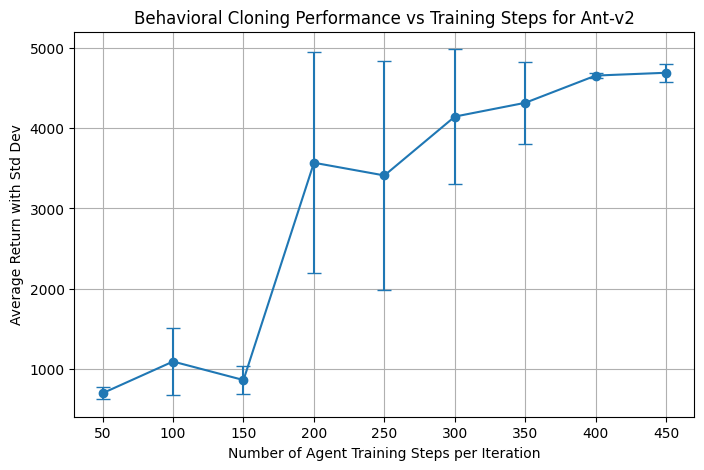

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# Data obtained by manually running BC Trainer for the mentioned num_agent_train_steps_per_iter
train_steps = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450])

avg_return = np.array([697.1458, 1091.7863, 860.99, 3569.90, 3411.3706,
                       4145.339, 4317.3798, 4656.703, 4691.663
                      ])
std_return = np.array([75.1909, 419.837, 173.44, 1375.769, 1430.478,
                       839.7302, 511.245, 32.502, 109.22
                      ])

plt.figure(figsize=(8, 5))
plt.errorbar(train_steps, avg_return, yerr=std_return, marker='o', linestyle='-', capsize=5)

plt.xlabel("Number of Agent Training Steps per Iteration")
plt.ylabel("Average Return with Std Dev")
plt.title("Behavioral Cloning Performance vs Training Steps for Ant-v2")

plt.grid(True)
plt.show()


In [197]:
#@markdown You can visualize your runs with tensorboard from within the notebook

%load_ext tensorboard
%tensorboard --logdir /content/hw_16831/hw1/data

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/main.py", line 27, in <module>
    from tensorboard import default
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/default.py", line 38, in <module>
    from tensorboard.plugins.graph import graphs_plugin
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/plugins/graph/graphs_plugin.py", line 30, in <module>
    from tensorboard.plugins.graph import keras_util
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/plugins/graph/keras_util.py", line 45, in <module>
    from tensorboard.compat.tensorflow_stub import dtypes
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/compat/tensorflow_stub/__init__.py", line 22, in <module>
    from .dtypes import as_dtype  # noqa
    ^^^^^^^^^^^^^^^^^

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Running DAgger (Problem 2)
Modify the settings above:
1. check the `do_dagger` box
2. set `n_iters` to `10`
and then rerun the code.